In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path=r'images/0veQz.jpg'

In [3]:
image=cv2.imread(image_path)
input_copy=image.copy()
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

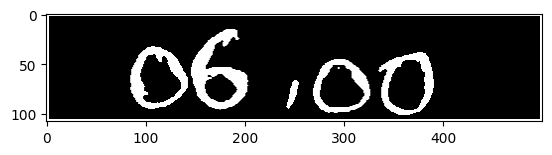

In [4]:
plt.imshow(img_gray, cmap='gray')

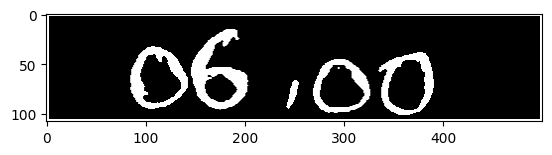

In [5]:
plt.imshow(img_gray, cmap='gray')

In [6]:
ret,thres = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY)

In [7]:
cv2.floodFill(thres, None, (0, 0), 0)

(3015,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=uint8),
 (0, 0, 500, 108))

In [8]:
contours, hierarchy = cv2.findContours(thres, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [9]:
img_contours = np.zeros(image.shape)

In [10]:
image_copy=image.copy()

In [11]:
cv2.drawContours(image_copy, contours, -1, (0,255,0), 3)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [15]:
cv2.imshow("Current Crop", thres)
cv2.waitKey(0)
cv2.destroyAllWindows()

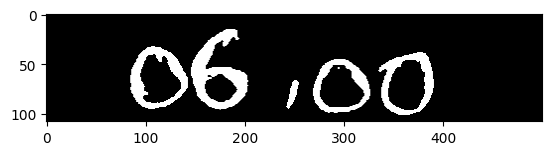

In [13]:
plt.imshow(thres, cmap='gray')

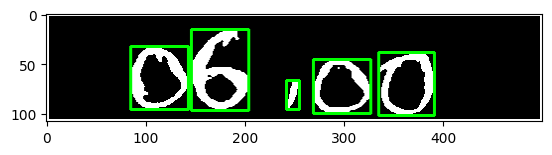

In [16]:
for _, c in enumerate(contours): 

    boundRect = cv2.boundingRect(c)

    rectX = boundRect[0]
    rectY = boundRect[1]
    rectWidth = boundRect[2]
    rectHeight = boundRect[3]

    rectArea = rectWidth * rectHeight

    minArea = 200

    if rectArea > minArea:
        color = (0, 255, 0)
        cv2.rectangle(input_copy, (int(rectX), int(rectY)),(int(rectX + rectWidth), int(rectY + rectHeight)), color, 2)
        cv2.imshow("Bounding Boxes", input_copy)
        currentCrop = image_copy[rectY:rectY+rectHeight,rectX:rectX+rectWidth]

        plt.imshow(input_copy)
        
        cv2.imshow("Current Crop", currentCrop)
        cv2.waitKey(0)
        cv2.destroyAllWindows()